In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re
import math
from v_finite_polygons import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon, Patch
import matplotlib.image as mpimg
from matplotlib.ticker import ScalarFormatter

In [3]:
InteriorSensors = {
    'S-01':[3.5,5],
    'S-02':[2,5],
    'S-03':[3.5,6.5],
    'S-04':[3.5,5.1],
    'S-05':[3.5,3.5],
    'S-06':[5,5],
    'S-07':[1,9.9],
    'S-08':[1,10],
    'S-09':[10-.1,10],
    'S-10':[10,10],
    'S-11':[10,1.1],
    'S-12':[10,1],
    'S-13':[1,1.1],
    'S-15':[1,1],
}

In [4]:
ZoneAssignments = pd.read_csv('./dataInfo/ZoneAssignments.csv')
key = list(ZoneAssignments.keys())[0]
numZones = len(set(ZoneAssignments[key]))

In [5]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-10.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-16.csv', './interpolatedData\\S-17.csv', './interpolatedData\\S-18.csv', './interpolatedData\\S-19.csv']


In [6]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\EE502 Door Closed.csv', './stretchedAvgData\\EE502 Door Open.csv', './stretchedAvgData\\EE502 Negative Pressure.csv', './stretchedAvgData\\EE504 Door Open.csv']


In [7]:
expData = glob.glob("./stretchedExpirementData/*.csv")
print(expData)

['./stretchedExpirementData\\EE502 Door Closed Exp 1.csv', './stretchedExpirementData\\EE502 Door Closed Exp 2.csv', './stretchedExpirementData\\EE502 Door Closed Exp 3.csv', './stretchedExpirementData\\EE502 Door Open Exp 1.csv', './stretchedExpirementData\\EE502 Door Open Exp 2.csv', './stretchedExpirementData\\EE502 Door Open Exp 3.csv', './stretchedExpirementData\\EE502 Negative Pressure Exp 1.csv', './stretchedExpirementData\\EE502 Negative Pressure Exp 2.csv', './stretchedExpirementData\\EE502 Negative Pressure Exp 3.csv', './stretchedExpirementData\\EE504 Door Open Exp 1.csv', './stretchedExpirementData\\EE504 Door Open Exp 2.csv', './stretchedExpirementData\\EE504 Door Open Exp 3.csv']


In [8]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [9]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [10]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x)

In [11]:
stExpDf = {}
for x in expData:
    name = x.split('\\')[1].split('.')[0]
    stExpDf[name] = pd.read_csv(x)


Text(0.5, 1.0, 'Variance in Particles')

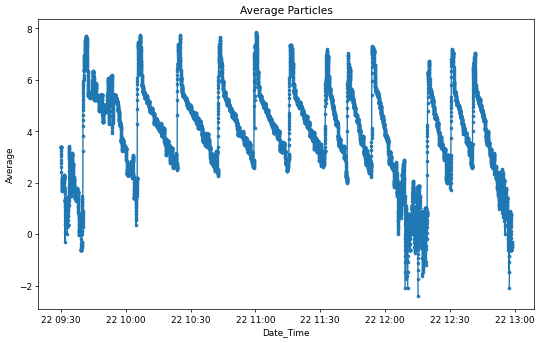

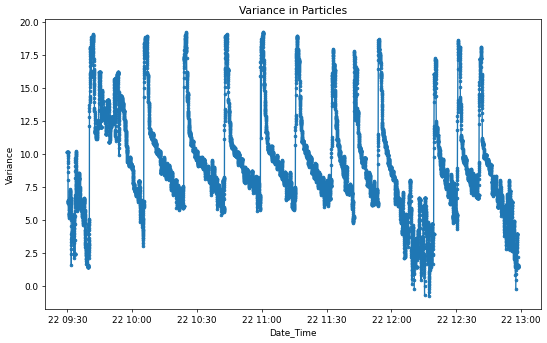

In [12]:
split = len(mergedData)

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

# fig = plt.figure(1, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Average')
# plt.title('Average Particles')

# fig = plt.figure(4, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Variance')
# plt.title('Variance in Particles')

In [13]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### All Sensors Plotted

In [14]:
mergedData

Date_Time  S-01  S-02  S-03  S-04  S-05  S-06  S-07  S-08  \
0     2021-03-22 09:30:00   0.0   0.0   0.0   0.0   0.0  21.0   9.0   0.0   
1     2021-03-22 09:30:01   0.0   0.0   0.0   0.0   0.0  21.9   8.1   0.0   
2     2021-03-22 09:30:02   0.0   0.0   0.0   0.0   0.0  22.8   7.2   0.0   
3     2021-03-22 09:30:03   0.0   0.0   0.0   0.0   0.0  23.7   6.3   0.0   
4     2021-03-22 09:30:04   0.0   0.0   0.0   0.0   0.0  24.6   5.4   0.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
12516 2021-03-22 12:58:36   0.0   3.6   5.4   0.0   0.0   0.0   0.0   2.4   
12517 2021-03-22 12:58:37   0.0   2.7   6.3   0.0   0.0   0.0   0.0   2.8   
12518 2021-03-22 12:58:38   0.0   1.8   7.2   0.0   0.0   0.0   0.0   3.2   
12519 2021-03-22 12:58:39   0.0   0.9   8.1   0.0   0.0   0.0   0.0   3.6   
12520 2021-03-22 12:58:40   0.0   0.0   9.0   0.0   0.0   0.0   0.0   4.0   

        S-09  ...  S-11  S-12  S-13  S-15  S-16  S-17  S-18  S-19    Average  \
0      702.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  40.666667   
1      702.0  ...   0.0   0.0   0.0   0.0   0.0   0.9   0.0   0.0  40.716667   
2      702.0  ...   0.0   0.0   0.0   0.0   0.0   1.8   0.0   0.0  40.766667   
3      702.0  ...   0.0   0.0   0.0   0.0   0.0   2.7   0.0   0.0  40.816667   
4      702.0  ...   0.0   0.0   0.0   0.0   0.0   3.6   0.0   0.0  40.866667   
...      ...  ...   ...   ...   ...   ...   ...   ...   ...   ...        ...   
12516    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.633333   
12517    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.655556   
12518    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.677778   
12519    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.700000   
12520    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.722222   

           Variance  
0      25753.222222  
1      25751.680556  
2      25750.138889  
3      25748.597222  
4      25747.055556  
...             ...  
12516      4.620370  
12517      4.682099  
12518      4.743827  
12519      4.805556  
12520      4.867284  

[12521 rows x 21 columns]

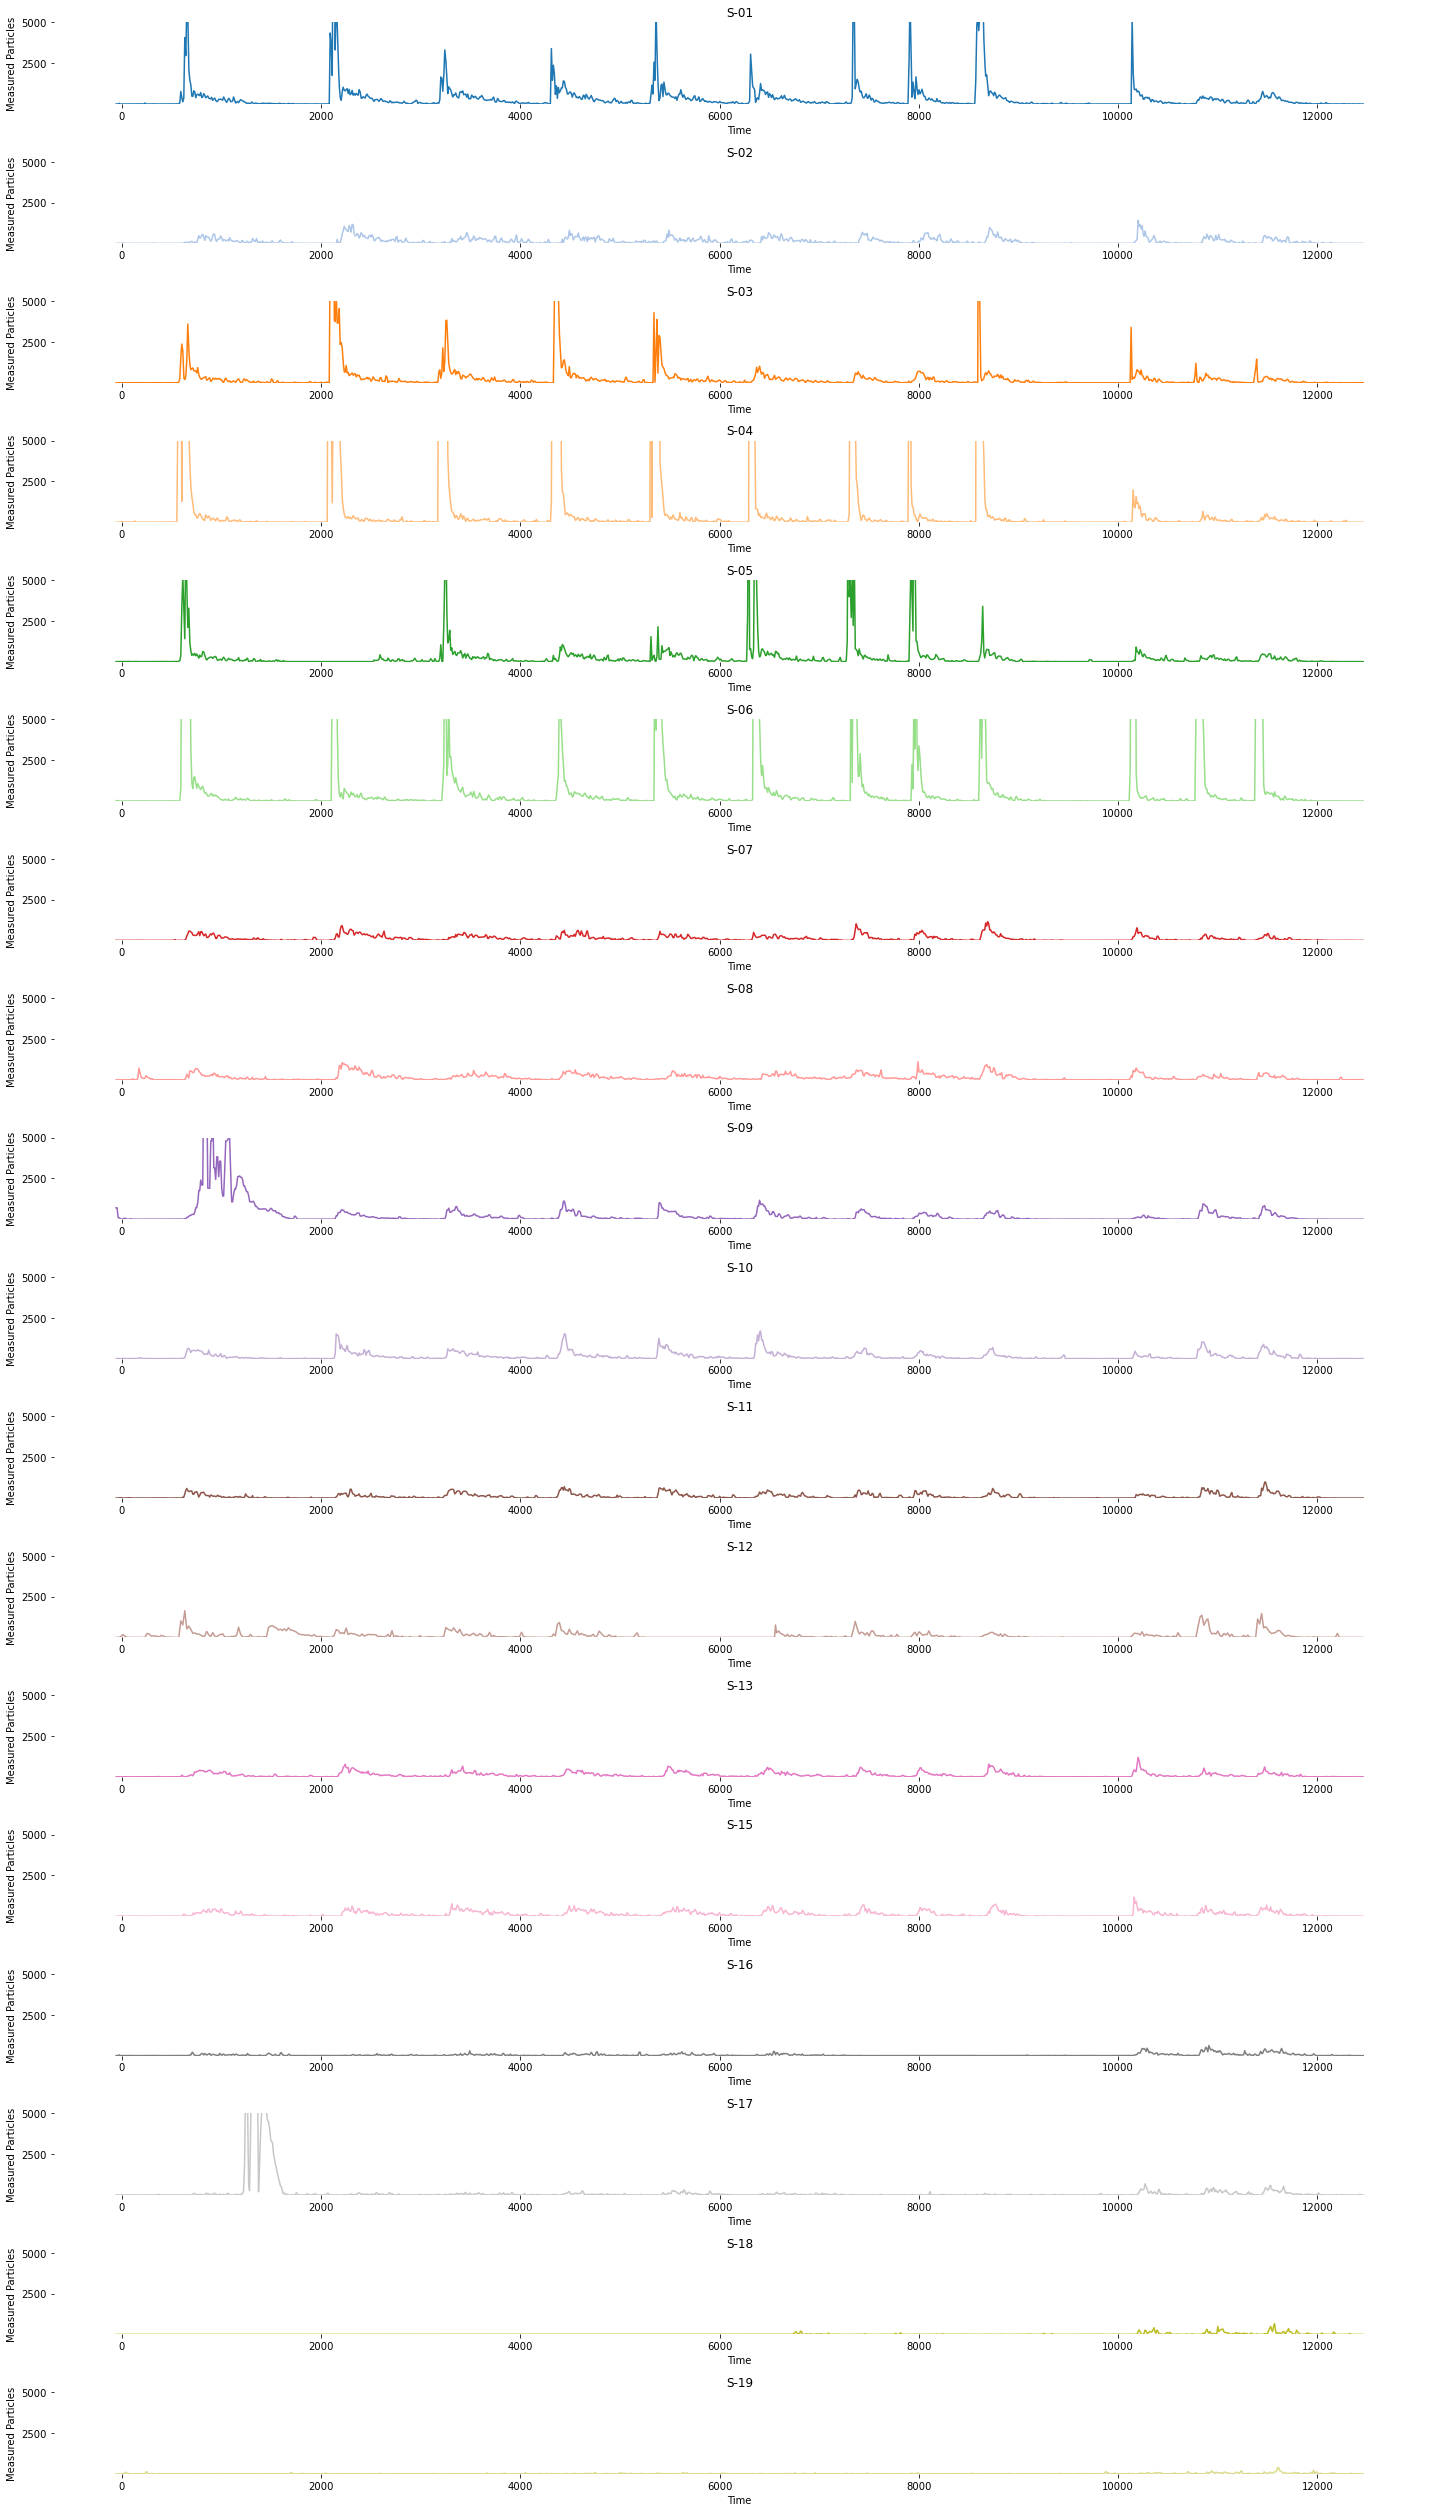

In [15]:

fig,sPlt=plt.subplots(18,sharex=False,sharey=False,figsize=(20,35))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    yData = (DataFrame[sensor])
    xData = [i for i in range(-60,len(yData)-60)]

    sPlt[idx].plot(xData,yData,color = color[idx],label = sensor)

    sPlt[idx].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[idx].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[idx].set(title=sensor,xlabel='Time',ylabel='Measured Particles')



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # ax.legend(prop={'size':9})
    ax.set_ylim([1,5000])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


### Zones Plotted Showing Sensor

In [16]:
InteriorSensors

{'S-01': [3.5, 5],
 'S-02': [2, 5],
 'S-03': [3.5, 6.5],
 'S-04': [3.5, 5.1],
 'S-05': [3.5, 3.5],
 'S-06': [5, 5],
 'S-07': [1, 9.9],
 'S-08': [1, 10],
 'S-09': [9.9, 10],
 'S-10': [10, 10],
 'S-11': [10, 1.1],
 'S-12': [10, 1],
 'S-13': [1, 1.1],
 'S-15': [1, 1]}

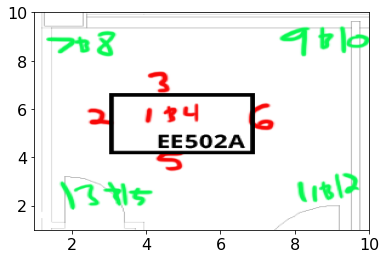

In [17]:
img = mpimg.imread("./Graphs, Images, and Animations/ICU1.png")
imgplot = plt.imshow(img, aspect='auto', extent=(1,10,1,10), alpha=1, zorder=-1)

### Check the Spatial Zoning distribution

In [18]:
if re.match('EE502',key):
    print('match')
else:
    print('no match')

match


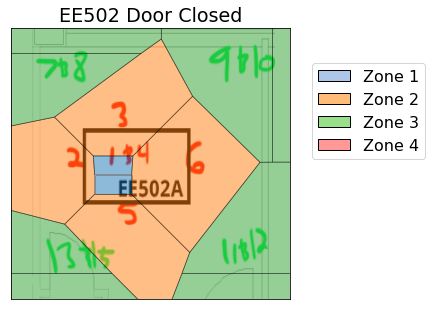

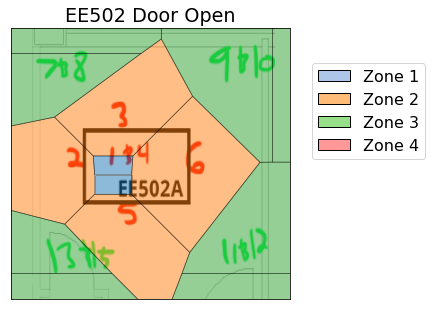

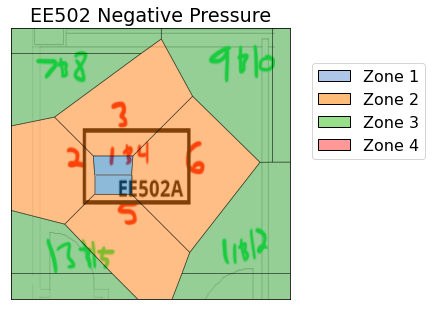

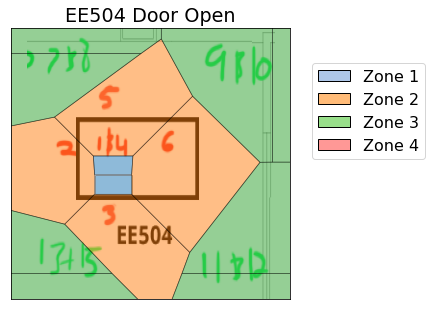

In [19]:
# ZoneAssignments.keys()
ISC = InteriorSensors
# fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(10,10))
for iteration,key in enumerate(ZoneAssignments.keys()):
    x=[]
    y=[]
    points = []
    for idx,sensor in enumerate(InteriorSensors):
        points.append(ISC[sensor])
    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)

    plt.figure(figsize=(5,5))
    if re.match('EE502',key):
        route = './Graphs, Images, and Animations/ICU1.png'
    else:
        route = './Graphs, Images, and Animations/ICU2.png'
    img = mpimg.imread(route)
    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
    ax = plt.subplot(111)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axis("equal")

    # Set limits
    ax.set_xlim(0,10)
    ax.set_ylim(0,11)

    # Add polygons 
    for idx,poly in enumerate(polygons):
        colored_cell = Polygon(poly,linewidth=0.7, alpha=0.5,facecolor=color[ZoneAssignments[key][idx]*2],edgecolor="black")
        ax.add_patch(colored_cell)
    plt.title(key)
    # got lazy here and explicitly defined the zones
    legend_elements = [Patch(facecolor=color[1], edgecolor='black',label='Zone 1'),
                       Patch(facecolor=color[3], edgecolor='black',label='Zone 2'),
                       Patch(facecolor=color[5], edgecolor='black',label='Zone 3'),
                       Patch(facecolor=color[7], edgecolor='black',label='Zone 4'),]
    plt.legend(handles = legend_elements,bbox_to_anchor=(1.05, .9))
    plt.show()
    # voronoi_plot_2d(vor)
        # sPlt[iteration%2][0 if iteration < 2 else 1].plot(X,Y,'o',color = C,mew = 10)


    


In [20]:
mergedData

Date_Time  S-01  S-02  S-03  S-04  S-05  S-06  S-07  S-08  \
0     2021-03-22 09:30:00   0.0   0.0   0.0   0.0   0.0  21.0   9.0   0.0   
1     2021-03-22 09:30:01   0.0   0.0   0.0   0.0   0.0  21.9   8.1   0.0   
2     2021-03-22 09:30:02   0.0   0.0   0.0   0.0   0.0  22.8   7.2   0.0   
3     2021-03-22 09:30:03   0.0   0.0   0.0   0.0   0.0  23.7   6.3   0.0   
4     2021-03-22 09:30:04   0.0   0.0   0.0   0.0   0.0  24.6   5.4   0.0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
12516 2021-03-22 12:58:36   0.0   3.6   5.4   0.0   0.0   0.0   0.0   2.4   
12517 2021-03-22 12:58:37   0.0   2.7   6.3   0.0   0.0   0.0   0.0   2.8   
12518 2021-03-22 12:58:38   0.0   1.8   7.2   0.0   0.0   0.0   0.0   3.2   
12519 2021-03-22 12:58:39   0.0   0.9   8.1   0.0   0.0   0.0   0.0   3.6   
12520 2021-03-22 12:58:40   0.0   0.0   9.0   0.0   0.0   0.0   0.0   4.0   

        S-09  ...  S-11  S-12  S-13  S-15  S-16  S-17  S-18  S-19    Average  \
0      702.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  40.666667   
1      702.0  ...   0.0   0.0   0.0   0.0   0.0   0.9   0.0   0.0  40.716667   
2      702.0  ...   0.0   0.0   0.0   0.0   0.0   1.8   0.0   0.0  40.766667   
3      702.0  ...   0.0   0.0   0.0   0.0   0.0   2.7   0.0   0.0  40.816667   
4      702.0  ...   0.0   0.0   0.0   0.0   0.0   3.6   0.0   0.0  40.866667   
...      ...  ...   ...   ...   ...   ...   ...   ...   ...   ...        ...   
12516    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.633333   
12517    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.655556   
12518    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.677778   
12519    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.700000   
12520    0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.722222   

           Variance  
0      25753.222222  
1      25751.680556  
2      25750.138889  
3      25748.597222  
4      25747.055556  
...             ...  
12516      4.620370  
12517      4.682099  
12518      4.743827  
12519      4.805556  
12520      4.867284  

[12521 rows x 21 columns]

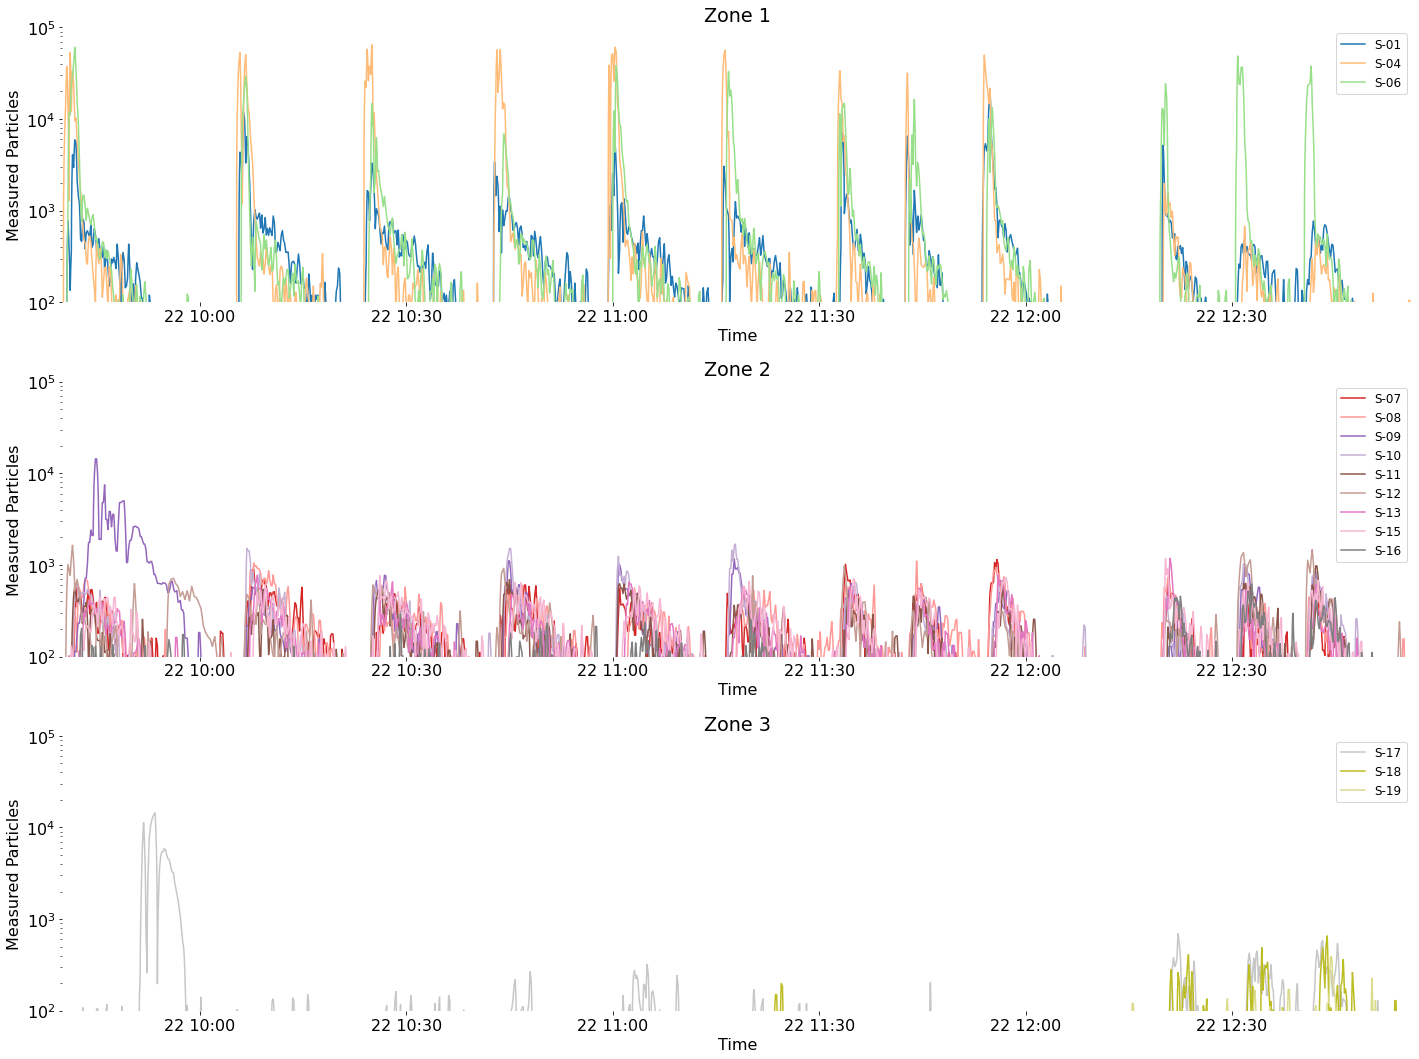

In [21]:

fig,sPlt=plt.subplots(3,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    if sensor in ['S-02','S-03','S-05']:
        continue
    if idx < 6:
        num = 0
    elif idx < 15:
        num = 1
    else:
        num = 2

    yData = DataFrame[sensor]
    xData = DataFrame["Date_Time"]

    sPlt[num].plot(xData,yData,color = color[idx],label = sensor)

for i in range(3):

    sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sensor = ['Zone 1','Zone 2','Zone 3']
    sPlt[i].set(title=sensor[i],xlabel='Time',ylabel='Measured Particles')
    
    # yData = DataFrame[DataFrame.keys()[21+i*2]]
    # xData = DataFrame["Date_Time"]
    # sPlt[i].plot(xData,yData,color = "Black",label = "Average",linewidth=2)
    # sPlt[i].grid(color='black', linestyle='--', linewidth=.1)



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.legend(prop={'size':12})
    # ax.legend(loc="upper right")
    ax.set_ylim([100,10**5])
    ax.set_xlim([pd.Timestamp('3/22/2021 9:40'),pd.Timestamp('3/22/2021 12:56:15')])
    ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


## Plots of Avg Zone reading with Avg sensor reading

In [22]:
# stExpDf[key + ' Exp '+str(i)]#[sensors[idx]]
# numExps
# [i for i,s in enumerate(stExpDf.keys()) if key in s]
# stExpDf.keys()

In [23]:
len(set(ZoneAssignments.iloc[:,1]))

5

In [24]:
idx

17

In [25]:
DataFrame.keys()

Index(['Date_Time', 'S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07',
       'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-15', 'S-16', 'S-17',
       'S-18', 'S-19', 'Average', 'Variance'],
      dtype='object')

In [26]:
idx

17

In [27]:
ZoneAssignments

EE502 Door Closed  EE502 Door Open  EE502 Negative Pressure  \
0                   0                0                        0   
1                   1                1                        1   
2                   1                1                        1   
3                   0                0                        0   
4                   1                1                        1   
5                   1                1                        1   
6                   2                2                        2   
7                   2                2                        2   
8                   2                2                        2   
9                   2                2                        2   
10                  2                2                        2   
11                  2                2                        2   
12                  2                2                        2   
13                  2                2                        2   
14                  2                2                        2   
15                  3                3                        3   
16                  3                3                        3   
17                  4                4                        4   

    EE504 Door Open  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
5                 1  
6                 2  
7                 2  
8                 2  
9                 2  
10                2  
11                2  
12                2  
13                2  
14                2  
15                3  
16                3  
17                4

In [28]:
stExpDf['EE502 Door Closed Exp 3']

S-01   S-02  S-03  S-04  S-05  S-06  S-07  S-08  S-09  S-10  ...  S-16  \
0    51.0   51.0   9.0  39.0   0.0  51.0   0.0   9.0   9.0   9.0  ...   9.0   
1    54.3   50.1  12.0  38.1   0.0  46.8   0.9  11.1   8.5   9.0  ...   9.0   
2    57.6   49.2  15.0  37.2   0.0  42.6   1.8  13.2   8.0   9.0  ...   9.0   
3    60.9   48.3  18.0  36.3   0.0  38.4   2.7  15.3   7.5   9.0  ...   9.0   
4    64.2   47.4  21.0  35.4   0.0  34.2   3.6  17.4   7.0   9.0  ...   9.0   
..    ...    ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
946  52.8  118.8  81.6  16.2  40.2  27.0  72.0  57.0   9.0  36.0  ...   9.0   
947  54.6  128.1  83.7  14.4  36.9  30.0  72.0  55.5   9.0  34.5  ...   9.0   
948  56.4  137.4  85.8  12.6  33.6  33.0  72.0  54.0   9.0  33.0  ...   9.0   
949  58.2  146.7  87.9  10.8  30.3  36.0  72.0  52.5   9.0  31.5  ...   9.0   
950  60.0  156.0  90.0   9.0  27.0  39.0  72.0  51.0   9.0  30.0  ...   9.0   

     S-17  S-18  S-19    Average     Variance  Zone 1  Zone 2   Zone 3  Zone 4  
0     0.0   0.0  21.0  21.500000   445.250000    45.0  27.750  19.5000   7.500  
1     0.0   0.0  21.0  21.322222   444.167284    46.2  27.225  19.0625   7.500  
2     0.0   0.0  21.0  21.144444   443.084568    47.4  26.700  18.6250   7.500  
3     0.0   0.0  21.0  20.966667   442.001852    48.6  26.175  18.1875   7.500  
4     0.0   0.0  21.0  20.788889   440.919136    49.8  25.650  17.7500   7.500  
..    ...   ...   ...        ...          ...     ...     ...      ...     ...  
946   5.4   0.0   0.0  39.122222  1389.400617    34.5  66.900  44.1500   3.600  
947   6.3   0.0   0.0  38.855556  1430.008025    34.5  69.675  42.0500   3.825  
948   7.2   0.0   0.0  38.588889  1470.615432    34.5  72.450  39.9500   4.050  
949   8.1   0.0   0.0  38.322222  1511.222840    34.5  75.225  37.8500   4.275  
950   9.0   0.0   0.0  38.055556  1551.830247    34.5  78.000  35.7500   4.500  

[951 rows x 24 columns]

In [29]:
trails = list(stExpDf.keys())
expirements = list(stAvgDf.keys())
[i for i in trails if expirements[0] in i]



['EE502 Door Closed Exp 1',
 'EE502 Door Closed Exp 2',
 'EE502 Door Closed Exp 3']

In [30]:
ZoneAssignments

EE502 Door Closed  EE502 Door Open  EE502 Negative Pressure  \
0                   0                0                        0   
1                   1                1                        1   
2                   1                1                        1   
3                   0                0                        0   
4                   1                1                        1   
5                   1                1                        1   
6                   2                2                        2   
7                   2                2                        2   
8                   2                2                        2   
9                   2                2                        2   
10                  2                2                        2   
11                  2                2                        2   
12                  2                2                        2   
13                  2                2                        2   
14                  2                2                        2   
15                  3                3                        3   
16                  3                3                        3   
17                  4                4                        4   

    EE504 Door Open  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
5                 1  
6                 2  
7                 2  
8                 2  
9                 2  
10                2  
11                2  
12                2  
13                2  
14                2  
15                3  
16                3  
17                4

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


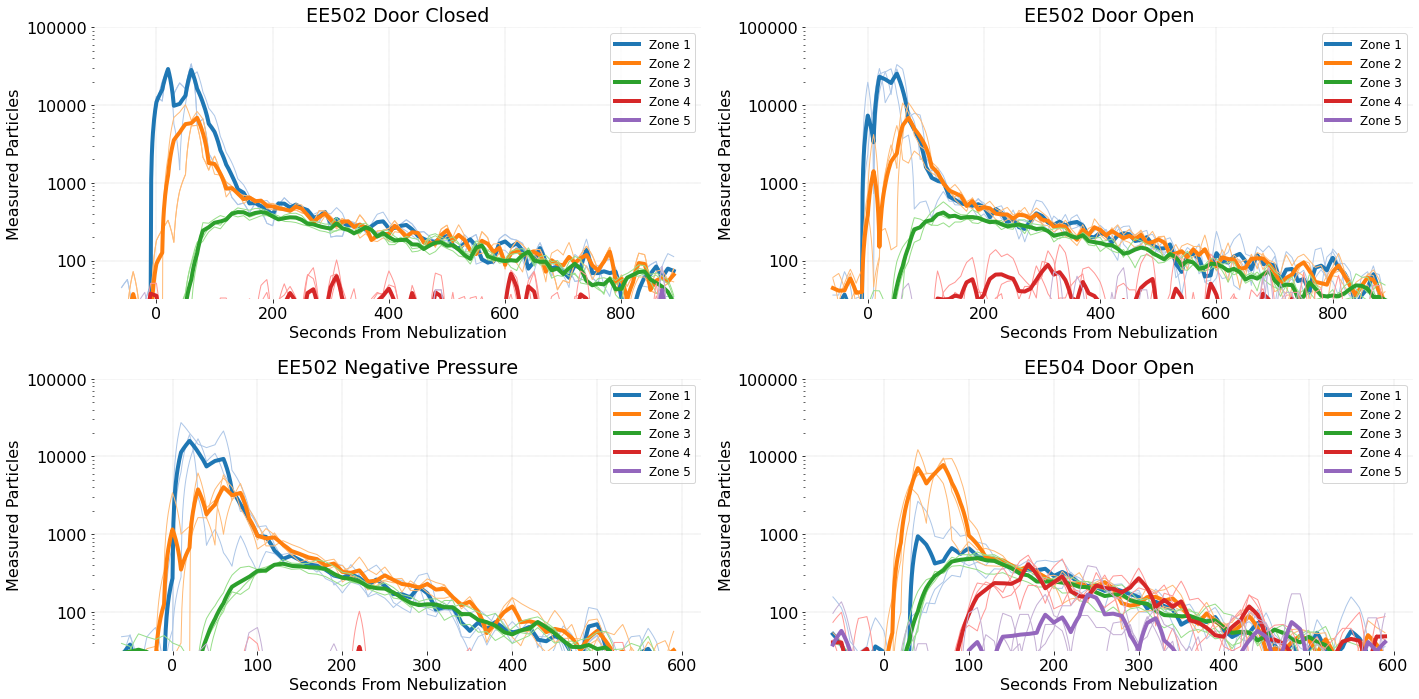

In [31]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(int(size/2),int(size/2),sharex=False,sharey=False,figsize=(20,2.5*size))
#fig.suptitle("March 22nd Data",fontsize=30)
numZones = len(set(ZoneAssignments.iloc[:,1]))
# numZones = 4

zones = ['Zone '+str(i+1) for i in range(numZones)]
trails = list(stExpDf.keys())
zoneFrame = {}
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())[:(-2-numZones+1)]
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])
    zoneFrame[key] = {}
    # creates a zoneFrame, which is a dictionary that will store of the sensor data for each zone for individual sensor plots
    for zone in range(numZones):
        zoneFrame[key][zone] = pd.DataFrame()

    for idx,zone in enumerate(ZoneAssignments[key]):
        for i in range(numExps):
            # print(idx)
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            zoneFrame[key][zone][sensors[idx] + ' Exp ' + str(i)] = yData


    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 

        for trail in [i for i in trails if key in i]:
            # print([0 if iteration < 1 else 1],[iteration%2])
            # print(trail,idx)
            try:
                yExpData = stExpDf[trail][zones[idx]]
            except:
                pass
            xExpData = [i for i in range(-60,len(yData)-60)]
            sPlt[0 if iteration < 2 else 1][iteration%2].plot(xExpData,yExpData,color = color[idx*2+1],linewidth=1)

        yData = DataFrame[zones[idx]]
        yError = np.var(zoneFrame[key][idx],axis = 1)**.5
        xData = [i for i in range(-60,len(yData)-60)]

        # sPlt[iteration].errorbar(xData,yData,yerr=yError,ecolor = color[idx*2+1],color = color[idx*2],label = zones[idx],linewidth=4)

        sPlt[0 if iteration < 2 else 1][iteration%2].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=4)

    sPlt[0 if iteration < 2 else 1][iteration%2].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[0 if iteration < 2 else 1][iteration%2].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for el in sPlt:
        for ax in el:
            ax.spines["top"].set_visible(False)   
            ax.spines["bottom"].set_visible(False)    
            ax.spines["right"].set_visible(False)    
            ax.spines["left"].set_visible(False) 
            ax.legend(prop={'size':12})
            # ax.legend(loc="upper right")
            ax.set_ylim([10**1.5,10**5])
            # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
            ax.set_yscale("log")
            ax.yaxis.set_major_formatter(ScalarFormatter())
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Quad_3-22.png")
    # break
# mpld3.save_html(fig,'ZonedVariances.html')



In [32]:
zoneTracker={}
for key in ZoneAssignments:
    for idx,zone in enumerate(ZoneAssignments[key]):
        print(sensors[idx],zone)

S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-15 2
S-16 2
S-17 3
S-18 3
S-19 4
S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-15 2
S-16 2
S-17 3
S-18 3
S-19 4
S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-15 2
S-16 2
S-17 3
S-18 3
S-19 4
S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-15 2
S-16 2
S-17 3
S-18 3
S-19 4


<AxesSubplot:>

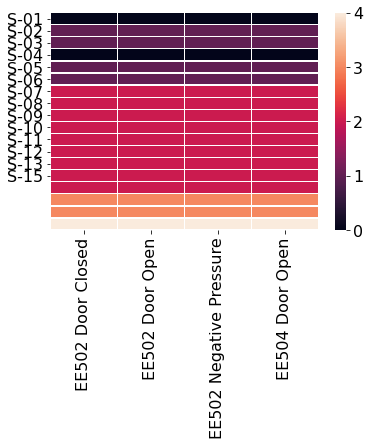

In [33]:
sns.heatmap(ZoneAssignments,yticklabels = sensors[:-5],label='x-small',linecolor='white',linewidths=.25)

In [34]:
indexList = {}
thresh = 1.5
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    if not switch:
        indexList[x] = idx-120
    print(indexList[x],'seconds',x)

830 seconds EE502 Door Closed
821 seconds EE502 Door Open
450 seconds EE502 Negative Pressure
465 seconds EE504 Door Open


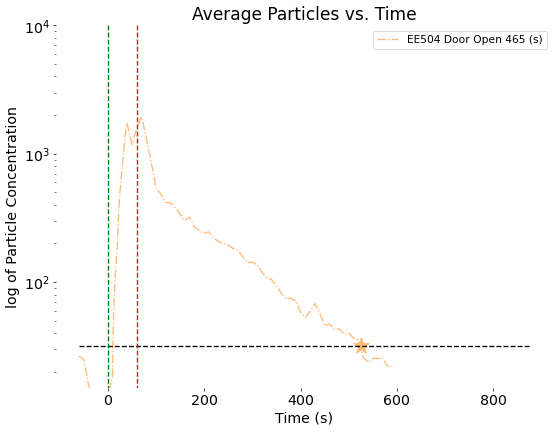

In [41]:
for idx,x in enumerate(stAvgDf):
    if re.match("EE502",x):
        continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,'-.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,875],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.ylim([10*1.5,10**4])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Avg_EE504_3-22.png")
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

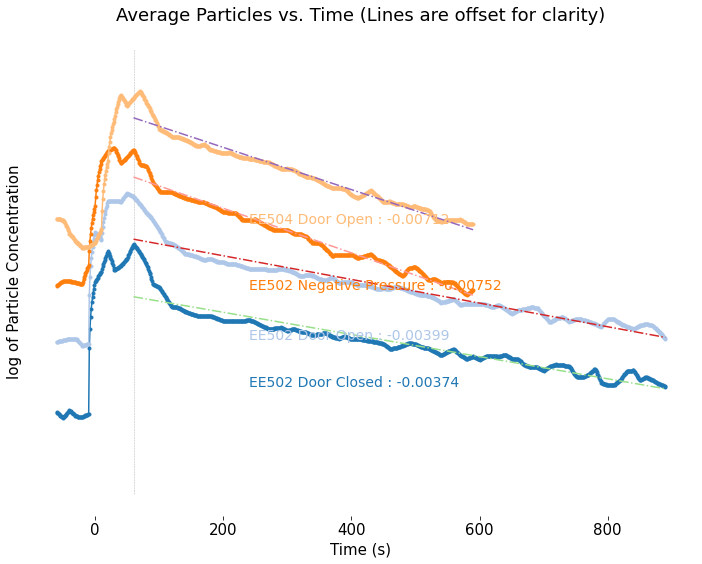

In [36]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  
spaceFactor = 2

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


### Plotting Data for Sensors

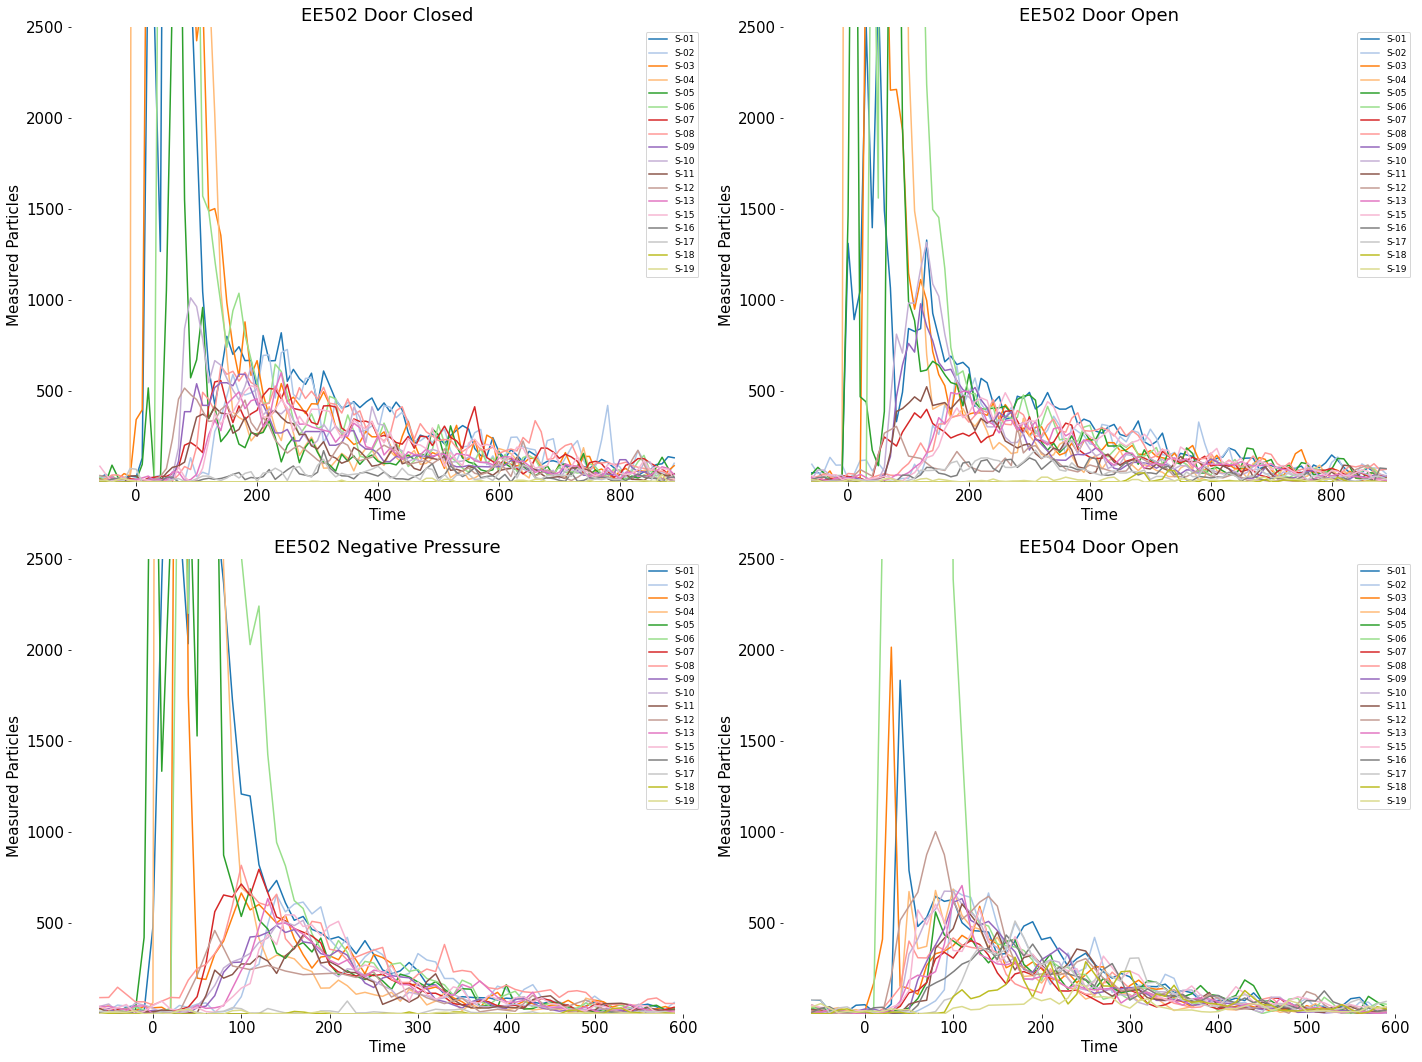

In [37]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:18]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,2500])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

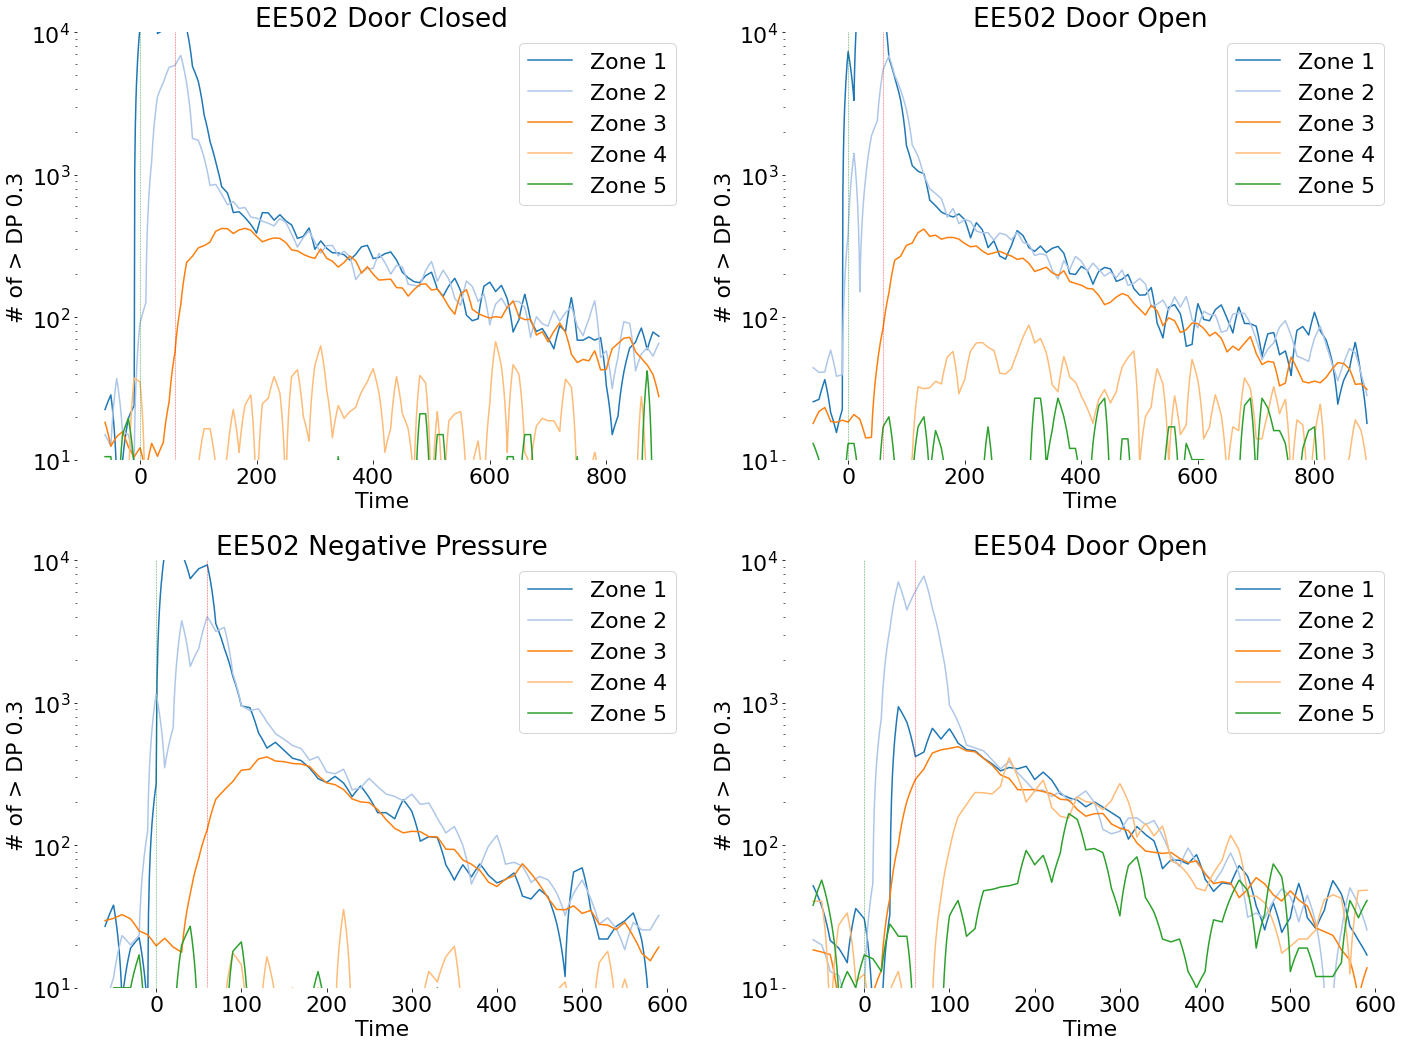

In [38]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        ax.set_yscale('log')
        ax.set_ylim([10,10**4])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})





In [39]:
DataFrame[x].columns[18:]

Index(['Average', 'Variance', 'Zone 1', 'Zone 2', 'Zone 3', 'Zone 4',
       'Zone 5'],
      dtype='object')

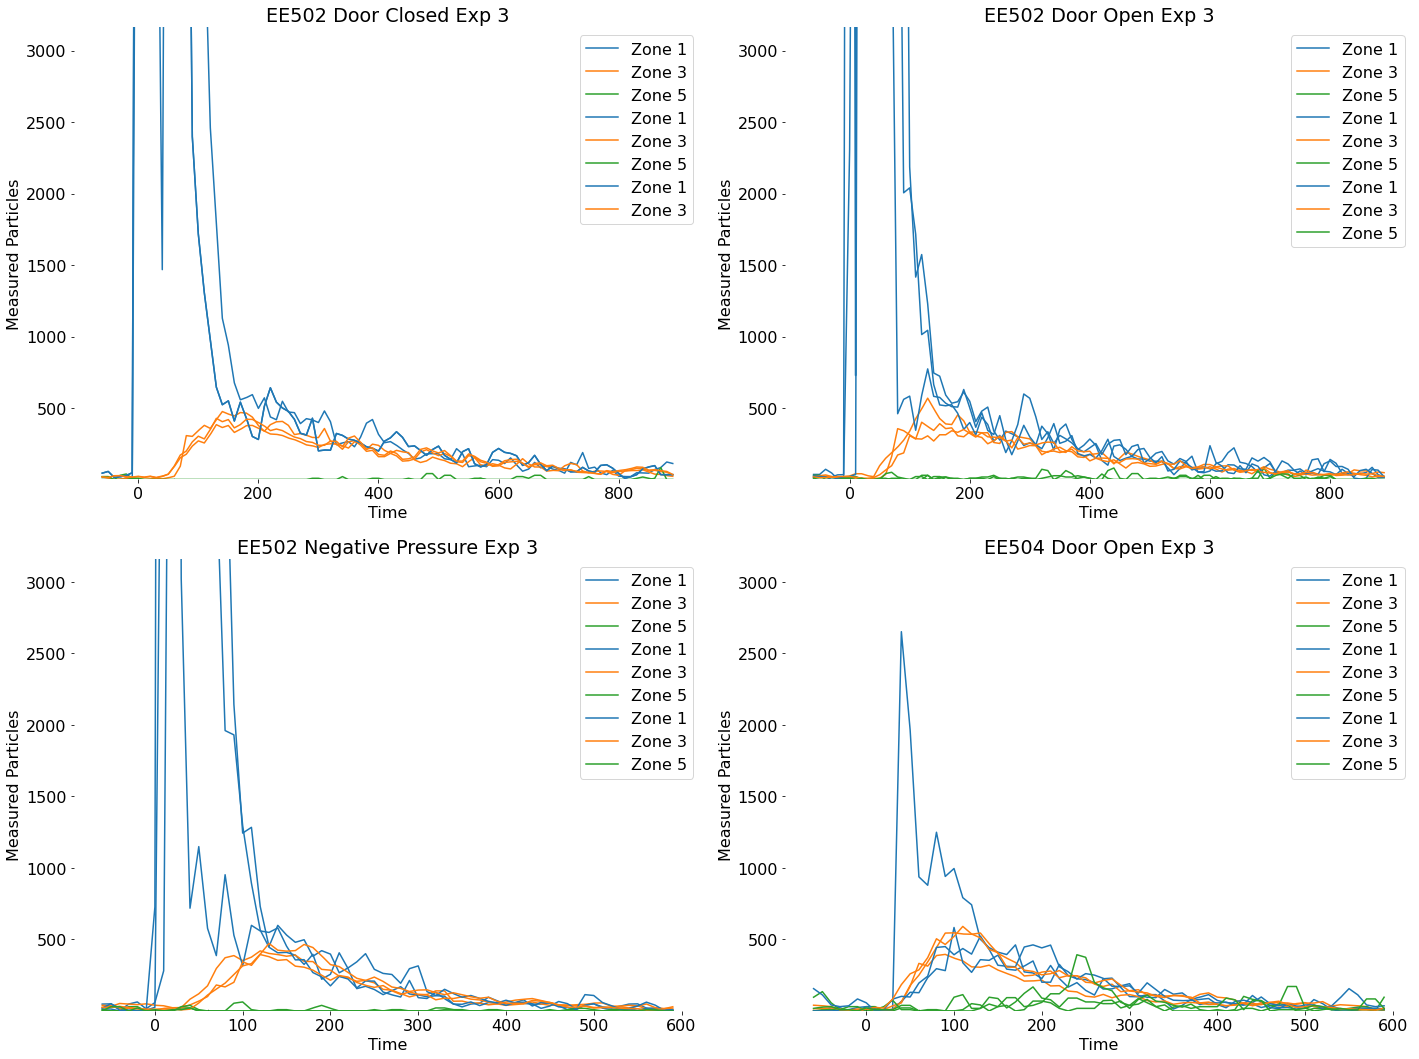

In [40]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stExpDf
for idx,x in enumerate(DataFrame):
    index = math.floor(idx/3)
    yData = DataFrame[x]
    xData = [i for i in range(-60,len(yData)-60)]
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
            if not loop%2:
                sPlt[1 if index > 1 else 0][index%2].plot(xData,yData[zone],color = color[loop],label = zone)

    sPlt[1 if index > 1 else 0][index%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if index > 1 else 0][index%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if index > 1 else 0][index%2].set(title=x,xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})
